In [1]:
#!/usr/bin/python

import numpy as np
import scipy.spatial

def power_iteration(b_k, A):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    # b_k = np.random.rand(A.shape[1])
    count = 0
    b_ks = []
    
    while(True):
        count += 1
        
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k1 = b_k1 / b_k1_norm
        
        if(scipy.spatial.distance.euclidean(b_k, b_k1) < 0.00001):
            b_k = b_k1
            break
        else:
            b_ks.append(b_k1)
            b_k = b_k1

    return b_k, count, b_ks

b_k, count, b_ks = power_iteration(np.array([3, 5]), np.array([[10, 3], [3, 6]]))

print(b_k)
print(count)


[0.88167215 0.47186251]
12


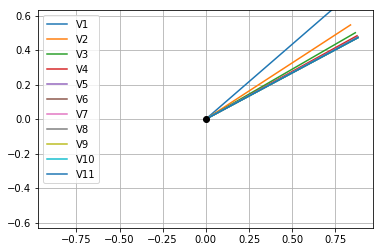

In [3]:
import numpy as np
import matplotlib.pyplot as plt
M = np.array(b_ks)

rows,cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
#This is optional
maxes = 1.1*np.amax(abs(M), axis = 0)

for i,l in enumerate(range(0,cols)):
    xs = [0,M[i,0]]
    ys = [0,M[i,1]]
    plt.plot(xs,ys)

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale
plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits
plt.legend(['V'+str(i+1) for i in range(cols)]) #<-- give a legend
plt.grid(b=True, which='major') #<-- plot grid lines
plt.show()
